### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle
import itertools
import matplotlib.pyplot as plt

### Finding all values of kappa, kappa_th

In [3]:
results_dir = '/home/basia/Documents/reactions_project/results/sacharose_1000/comparing_with_first/known_substrats/'

In [4]:
def convert(txt):
    k = float(txt)
    if k%1 ==0:
        return int(k)
    return k

In [5]:
all_kappas = []
all_kappas_th = []
for file in os.listdir(results_dir):
    if file.startswith('noise_proportions_in_times'):
        kappa = convert(file.split('_')[4])
        all_kappas.append(kappa)
        kappa_th = convert(file.split('_')[5][:-4])
        all_kappas_th.append(kappa_th)
        
all_kappas = sorted(list(set(all_kappas)))
all_kappas_th = sorted(list(set(all_kappas_th)))

In [6]:
kappas_to_remove = [0.75]
kappas_th_to_remove = [0.75]

In [7]:
all_kappas = sorted(list(set(all_kappas) - set(kappas_to_remove)))
all_kappas_th = sorted(list(set(all_kappas_th) - set(kappas_th_to_remove)))

In [9]:
all_kappas

[0.1, 0.25, 0.5, 1]


### Reading results for different values of kappa, kappa_th

In [10]:
results_dict = {}

for kappa in all_kappas:
    for kappa_th in all_kappas_th:
        try:
            with open(results_dir + 'proportions_in_times_' +
                                  str(kappa)+'_'+str(kappa_th)+'.pkl', 'rb') as f:
                y = pickle.load(f)
                y = np.array(y)
                results_dict[(kappa, kappa_th)] = y
        except FileNotFoundError:
            results_dict[(kappa, kappa_th)] = None

In [ ]:
#missing:
(0.25, 0.5)
(0.75, 0.25)
-------
(0.75, 0.5)
-------
(0.75, 0.75)
-------
(0.75, 1)
(1, 0.75)

### Visualising results

In [32]:
results_dir = 'results/sacharose_1000/comparing_with_first/known_substrats/'
substances_names = ['Sacharose', 'Glucose', 'Fructose']

In [46]:
component_nr = 2

/tmp/ipykernel_290570/4023749697.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]


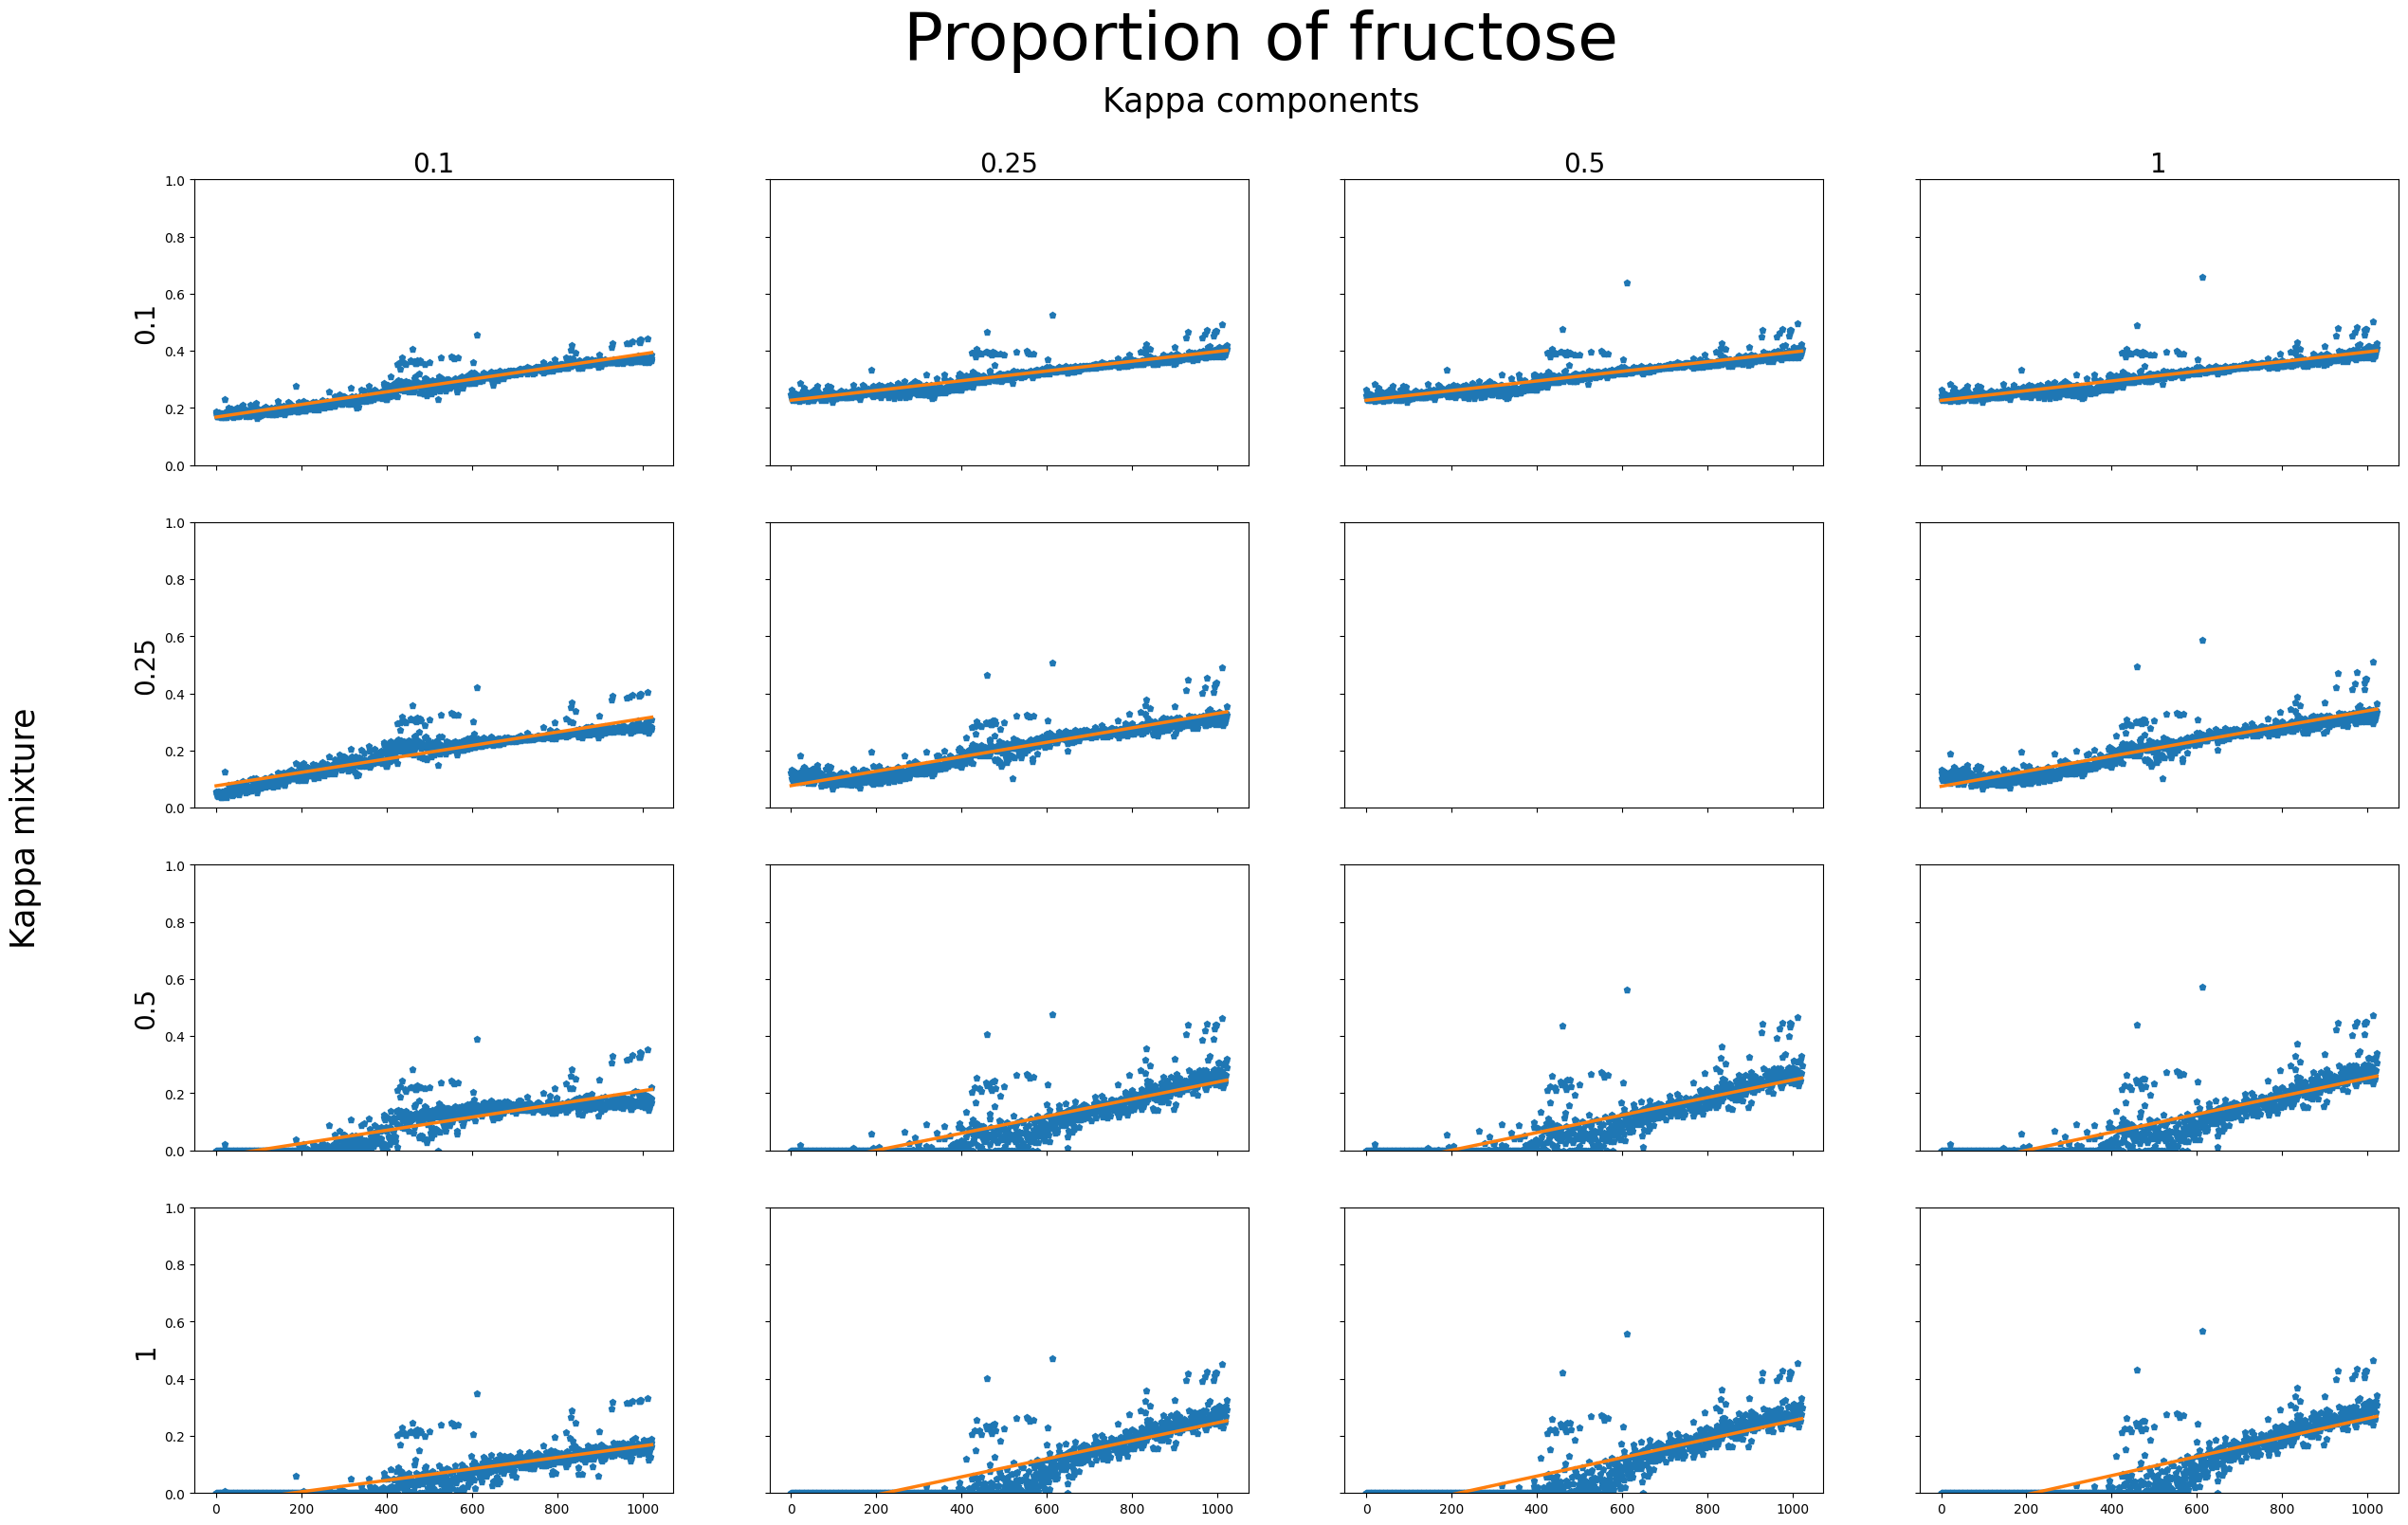

In [47]:
t = np.array(range(1,1024))
t_and_ones = np.vstack([t, np.ones(len(t))]).T

fig, axs = plt.subplots(len(all_kappas), len(all_kappas_th), sharex='all', sharey='all')
fig.suptitle('Proportion of ' + substances_names[component_nr].lower(), fontsize=50)
fig.set_size_inches(30, 18, forward=True)

fig.text(0.5, 0.92, 'Kappa components', ha='center', size=25)
fig.text(0.06, 0.5, 'Kappa mixture', va='center', rotation='vertical', size=25)

for i, ax in enumerate(axs):
    kappa = all_kappas[i]
    for j, axx in enumerate(ax):
        kappa_th = all_kappas_th[j]
        try:
            y = results_dict[(kappa, kappa_th)][:, component_nr]
            slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]
            axx.plot(range(len(y)), y, 'p', markersize=5)
            axx.plot(slope*t+intercept, linewidth=2.5)
        except TypeError:
            axx.plot(0,0)
        
cols = [str(kappa_th) for kappa_th in all_kappas_th]
rows = [str(kappa) for kappa in all_kappas]       

for ax, col in zip(axs[0], cols):
    ax.set_title(col, size=20)
    ax.set_ylim(0,1)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size=20)
fig.savefig(results_dir+'comparison_for_different_kappas_'+ substances_names[component_nr]+'.png')

### Products together

/tmp/ipykernel_290570/1558074734.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]


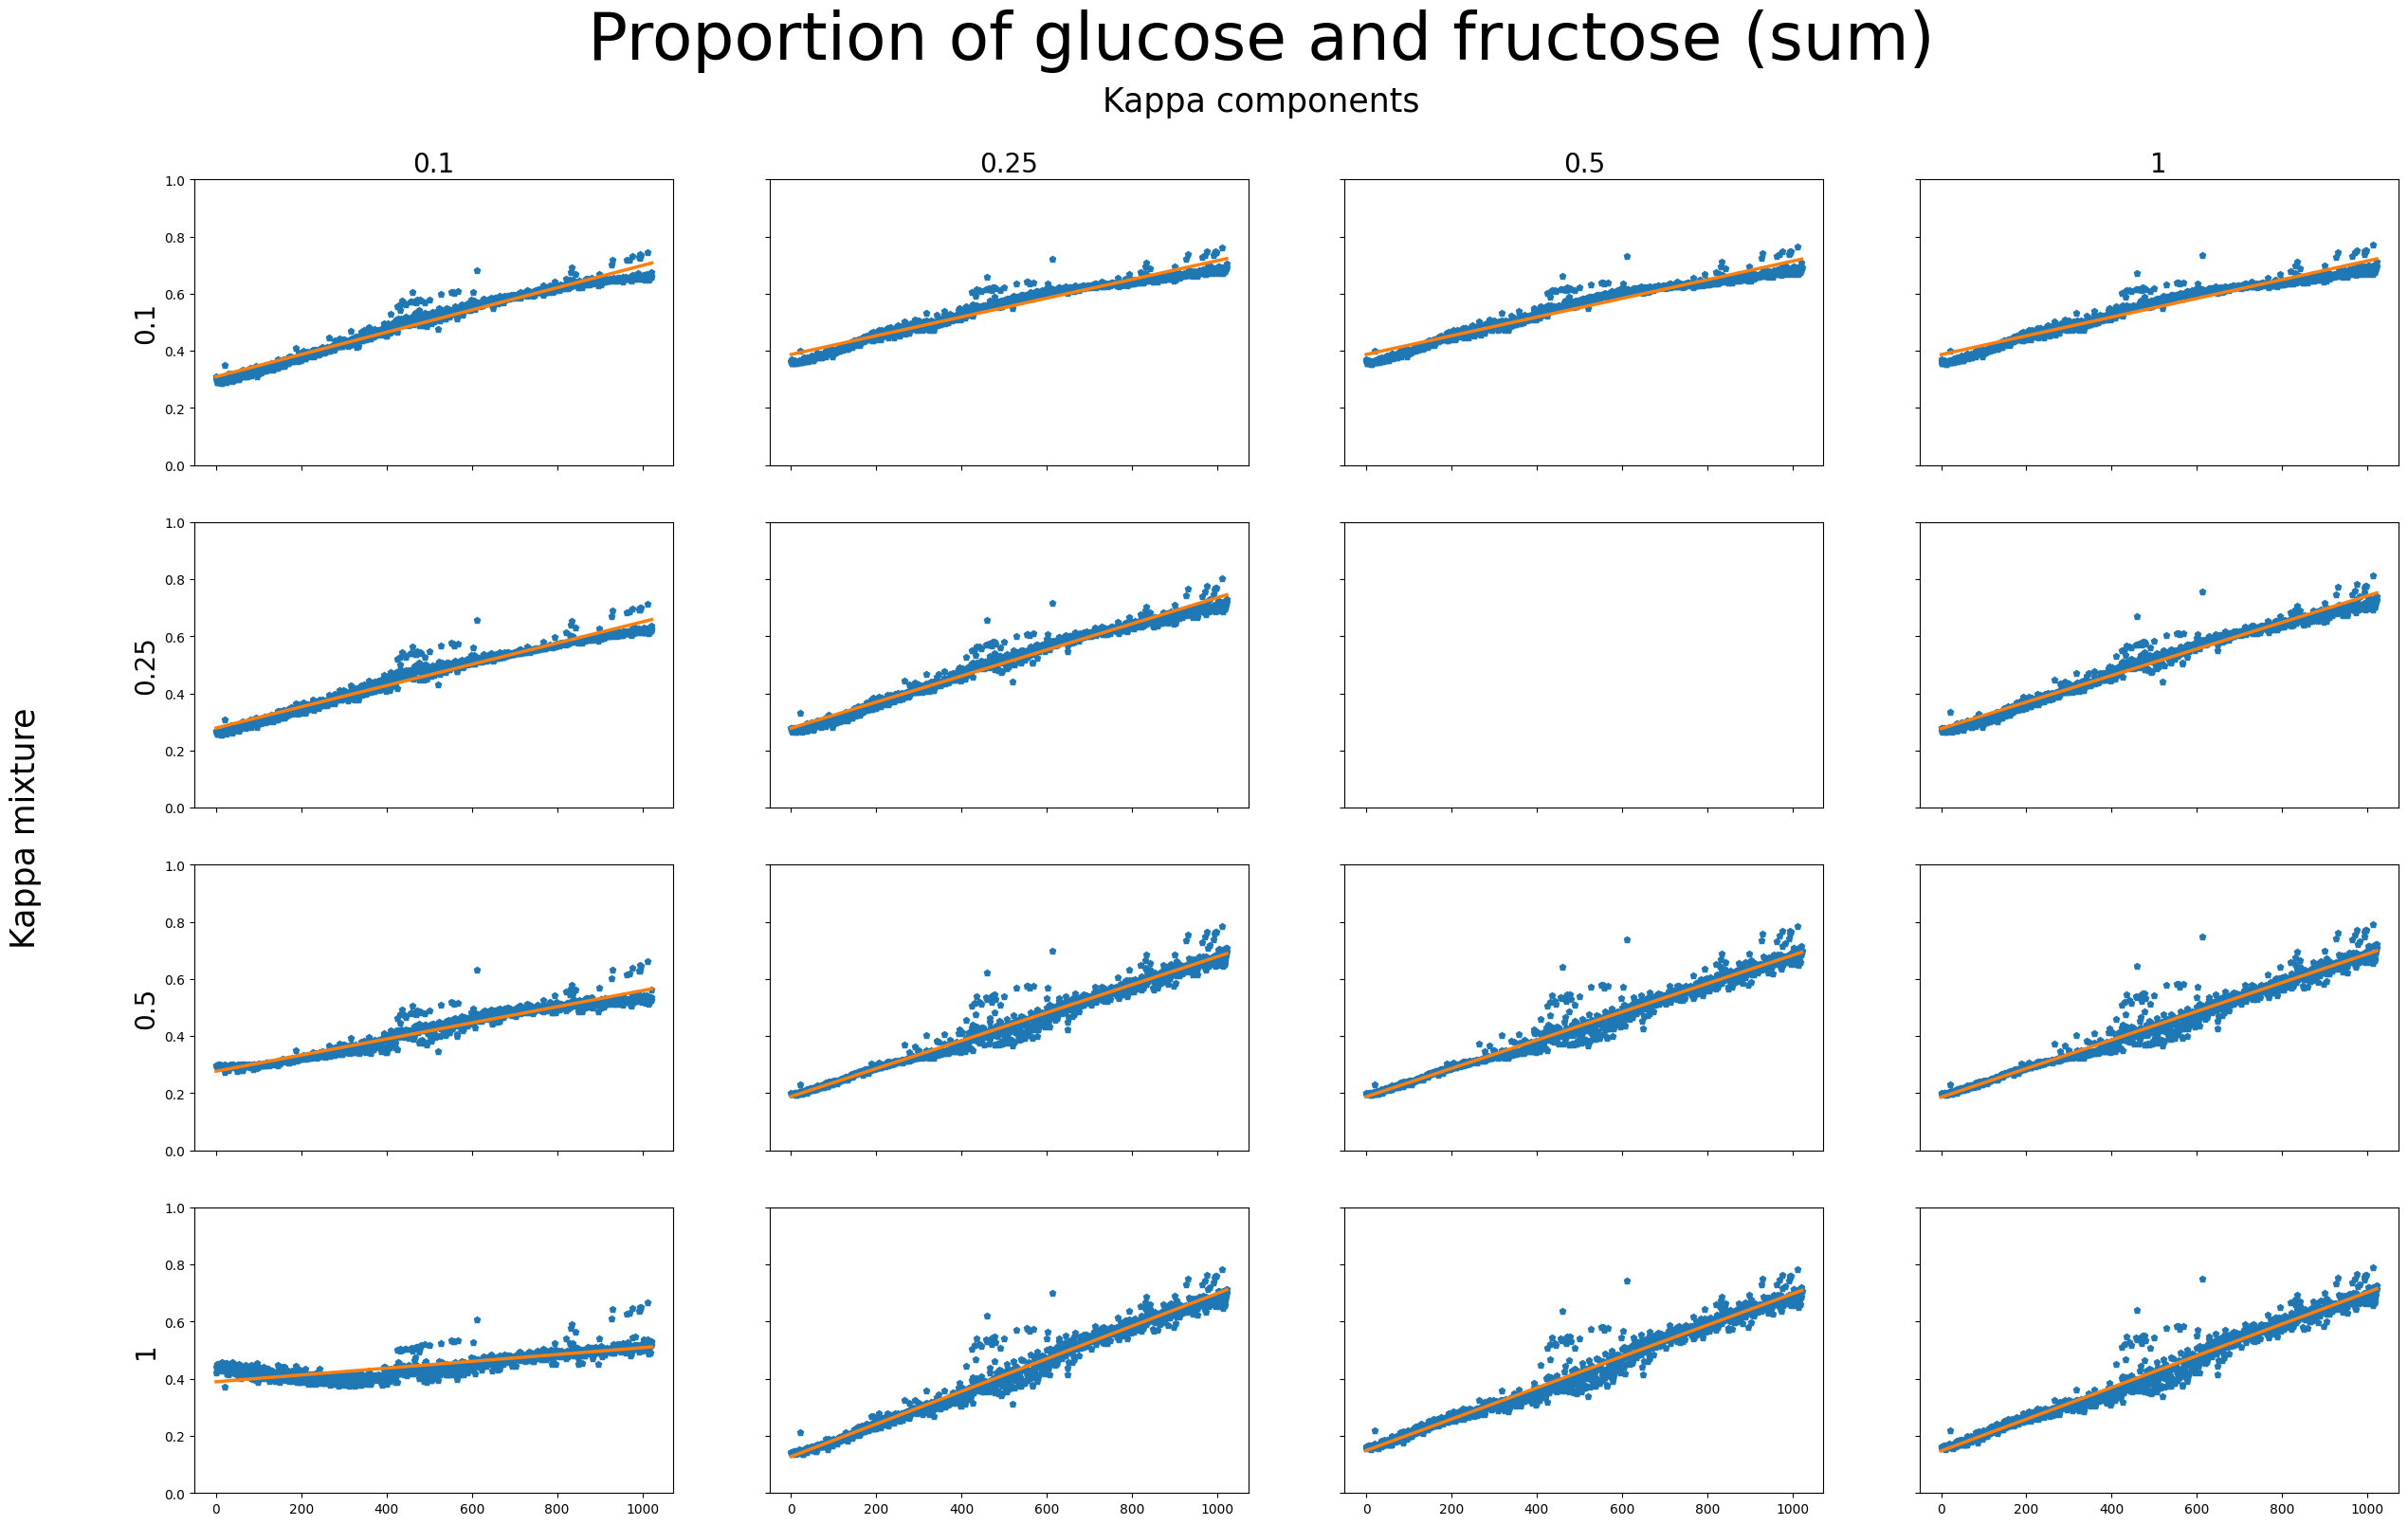

In [41]:
t = np.array(range(1,1024))
t_and_ones = np.vstack([t, np.ones(len(t))]).T

fig, axs = plt.subplots(len(all_kappas), len(all_kappas_th), sharex='all', sharey='all')
fig.suptitle('Proportion of glucose and fructose (sum)', fontsize=50)
fig.set_size_inches(30, 18, forward=True)

fig.text(0.5, 0.92, 'Kappa components', ha='center', size=25)
fig.text(0.06, 0.5, 'Kappa mixture', va='center', rotation='vertical', size=25)

for i, ax in enumerate(axs):
    kappa = all_kappas[i]
    for j, axx in enumerate(ax):
        kappa_th = all_kappas_th[j]
        try:
            y = results_dict[(kappa, kappa_th)][:, 1] + results_dict[(kappa, kappa_th)][:, 2]
            slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]
            axx.plot(range(len(y)), y, 'p', markersize=5)
            axx.plot(slope*t+intercept, linewidth=2.5)
        except TypeError:
            axx.plot(0,0)
        
cols = [str(kappa_th) for kappa_th in all_kappas_th]
rows = [str(kappa) for kappa in all_kappas]       

for ax, col in zip(axs[0], cols):
    ax.set_title(col, size=20)
    ax.set_ylim(0,1)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size=20)
fig.savefig(results_dir+'comparison_for_different_kappas_'+ 'Glucose_and_fructose' +'.png')

#### Best one

In [35]:
best_kappa = 0.1
best_kappa_th = 1

In [42]:
with open(r'/home/basia/Documents/reactions_project/results/sacharose_1000/comparing_with_first/known_substrats/proportions_in_times_'+str(best_kappa)+'_'+str(best_kappa_th)+'.pkl', 'rb') as f:
    y = pickle.load(f)
    y = np.array(y)

In [44]:
t = np.array(range(1,1024))
t_and_ones = np.vstack([t, np.ones(len(t))]).T

In [62]:
component_nr = 0

In [63]:
slope, intercept = np.linalg.lstsq(t_and_ones, y[:, component_nr])[0]

/tmp/ipykernel_46827/2235024950.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, intercept = np.linalg.lstsq(t_and_ones, y[:, component_nr])[0]


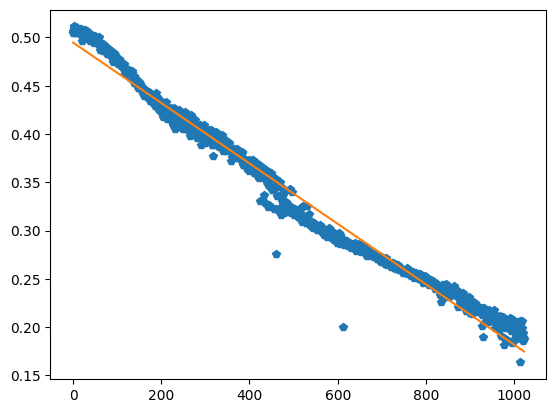

In [64]:
plt.plot(range(len(y)), y[:, component_nr], 'p')
plt.plot(slope*t+intercept)